In [1]:
import pandas as pd

In [2]:
import os 
filepath = os.path.join(os.getcwd(), 'Dados', 'dataset_tratado.csv')

In [3]:
# Cria o DataFrame completo, com todos os dados do arquivo dataset_tratado.csv

df_completo = pd.read_csv(filepath, engine='python', 
                     on_bad_lines='warn', header=0, sep = ",")

In [4]:
df_completo.head()

,ANO_INGRESSO,SEMESTRE_INGRESSO,TIPO_INGRESSO,COTA,CURSO_NOME,AREA,SITUACAO,MOTIVO_SAIDA,CAMPUS,TURNO,...,LAT,LOCAL,LNG_ORGM,LAT_ORGM,LOCAL_ORGM,Baixa renda,Escola pública,Etnia PPI,PCD,Estado
0,2008.0,1.0,Transferência Obrigatória,NaN,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,-21.753129,"VALE DO IPE, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN,Não,Não,Não,Não,NaN
1,2008.0,1.0,VESTIBULAR,Grupo B,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,-21.804313,"PARQUE JARDIM DA SERRA, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN,Sim,Sim,Não,Não,NaN
2,2008.0,1.0,PISM,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,Abandono,JUIZ DE FORA,INTEGRAL,...,-21.750069,"SANTA CATARINA, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN,Não,Não,Não,Não,NaN
3,2008.0,1.0,VESTIBULAR,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Concluido,Conclusão,JUIZ DE FORA,INTEGRAL,...,-21.718564,"ANDRELANDIA, MG, BRASIL",NaN,NaN,NaN,Não,Não,Não,Não,NaN
4,2008.0,1.0,VESTIBULAR,Grupo B,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,-20.850899,"PAULA CANDIDO, MG, BRASIL",NaN,NaN,NaN,Sim,Sim,Não,Não,NaN


In [5]:
# Cria um novo DataFrame somente com alunos que ingressaram de 2013 em diante

df_ingressantes_apos_2012 = df_completo.loc[(df_completo['ANO_INGRESSO'] > 2012)]

In [6]:
# Para visualizar os 5 primeiros registros do DataFrame somente com alunos que ingressaram de 2013 em diante, retire o # do início da linha abaixo

#df_ingressantes_apos_2012.head()

In [7]:
# Mantém no DataFrame df_ingressantes_apos_2012 apenas os alunos que ingressaram por SiSU ou PISM
# REGISTRAR AQUI POR QUE RESOLVEMOS MANTER SOMENTE ESSES REGISTROS

df_ingressantes_apos_2012 = df_ingressantes_apos_2012.loc[(df_ingressantes_apos_2012['TIPO_INGRESSO'] == 'SiSU') 
            | (df_ingressantes_apos_2012['TIPO_INGRESSO'] == 'PISM') 
            | (df_ingressantes_apos_2012['TIPO_INGRESSO'] == 'SiSU VAGA OCIOSA')
            | (df_ingressantes_apos_2012['TIPO_INGRESSO'] == 'PISM VAGA OCIOSA')]

In [8]:
# Cria um DataFrame somente com alunos evadidos de 2013 em diante
df_evadidos = df_ingressantes_apos_2012.loc[df_ingressantes_apos_2012['SITUACAO'] == 'Evadido']

In [9]:
# Quantidade de evadidos por curso
qtt_evadidos_por_curso = df_evadidos['CURSO_NOME'].value_counts()

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

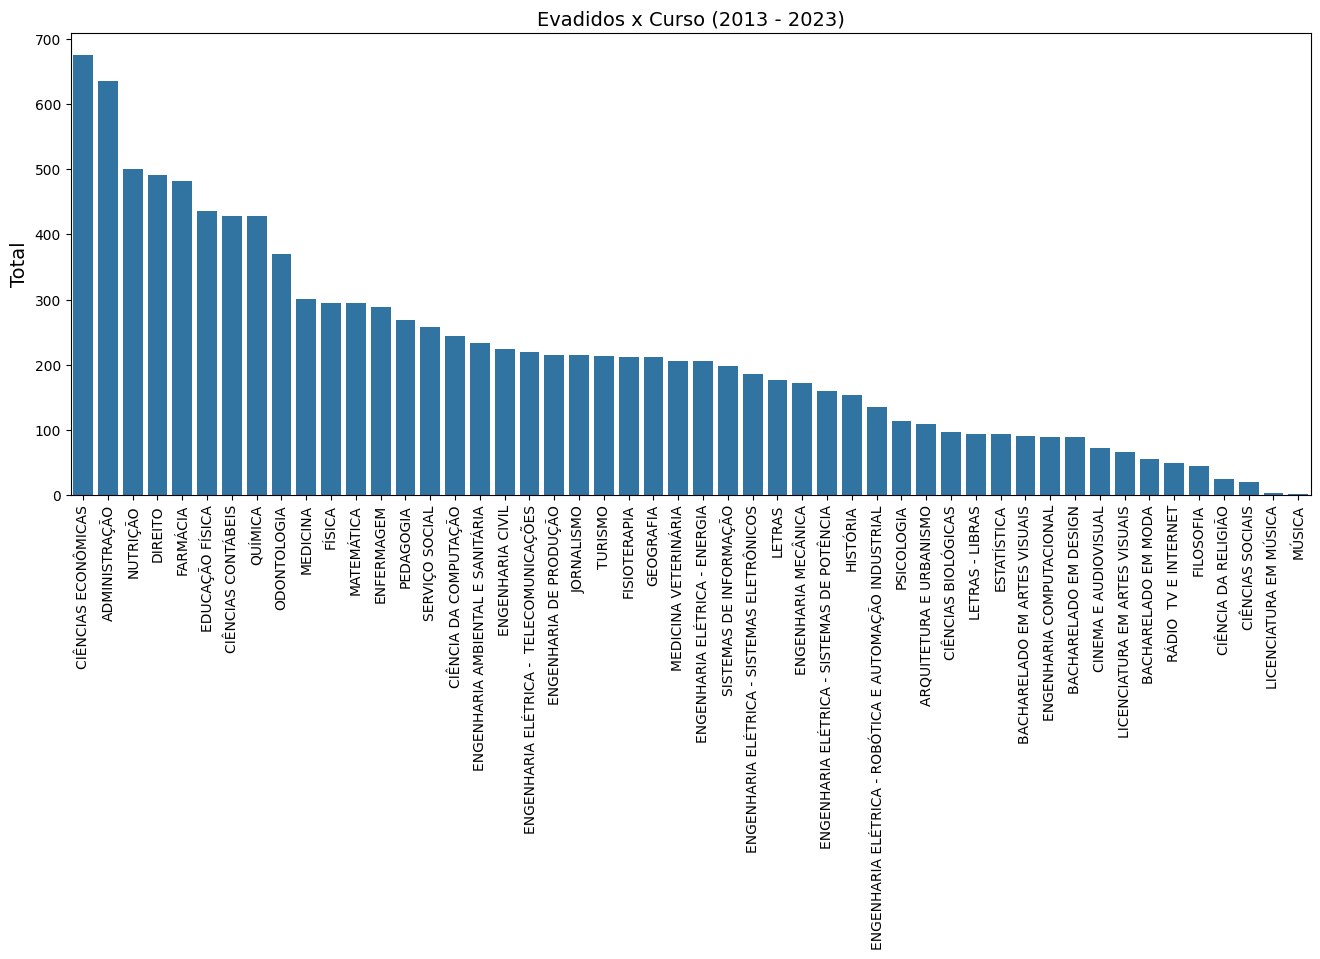

In [11]:
# Gera um gráfico de barras com a quantidade absoluta de evadidos por curso, de 2013 em diante

f, axes = plt.subplots(1, 1,  figsize=(16, 6))

g = sns.barplot(x=qtt_evadidos_por_curso.index, 
                y=qtt_evadidos_por_curso)

axes.set_title('Evadidos x Curso (2013 - 2023)', fontsize=14)
axes.set_ylabel('Total', fontsize=14)
axes.set(xlabel='') 

plt.xticks(rotation=90)

plt.show()

In [12]:
def calcular_qtt_situacao(df_ingressantes_apos_2012, filtro, situacao):
    df = df_ingressantes_apos_2012.loc[df_ingressantes_apos_2012['SITUACAO'] == situacao]
    return df.groupby('CURSO_NOME')[filtro].value_counts()

In [13]:
# EXPLICAR O QUE A FUNÇÃO ABAIXO FAZ 

def evadido_vs_ingressante_por_filtro(df_ingressantes, filtro):
    #calcular uma série com o número de alunos, evadidos, número de concluídos e número de ativos
    qtt_filtro_por_curso = df_ingressantes.groupby('CURSO_NOME')[filtro].value_counts()
    qtt_evadidos_por_filtro = calcular_qtt_situacao(df_ingressantes, filtro, 'Evadido')
    qtt_concluidos_por_filtro =  calcular_qtt_situacao(df_ingressantes, filtro, 'Concluido')
    qtt_ativos_por_filtro =  calcular_qtt_situacao(df_ingressantes, filtro, 'Ativo')
    
    #cruzamento das Series criadas anterioresmente    
    df = pd.merge(qtt_filtro_por_curso, qtt_evadidos_por_filtro, 
                                      how='left', on=['CURSO_NOME', filtro], suffixes=('_total', '_evadidos')).fillna(0)
    df = pd.merge(df, qtt_concluidos_por_filtro, 
                                      how='left', on=['CURSO_NOME', filtro], suffixes=('', '_concluintes')).fillna(0)
    df = pd.merge(df, qtt_ativos_por_filtro, 
                                      how='left', on=['CURSO_NOME', filtro], suffixes=('', '_ativos')).fillna(0)
    df = df.rename(columns={'count': 'count_concluintes'}).sort_values(filtro)
    df.columns = ['total', 'evadidos', 'concluidos', 'ativos']

    #calculando os percentuais
    df['pct_evasao'] = df['evadidos']/df['total']
    df['pct_concluido'] = df['concluidos']/df['total']
    df['pct_ativo'] = df['ativos']/df['total']
   
    return df

In [14]:
# EXPLICAR O QUE A FUNÇÃO FAZ 

def cota_por_curso(evadido_vs_ingressante, curso):
    
    ax = evadido_vs_ingressante[['evadidos', 'concluidos', 'ativos']].loc[curso].plot(kind='bar', stacked=True, figsize=[10,6])
    
    df = evadido_vs_ingressante.loc[curso]
    
    for i, eixo_x in enumerate(ax.get_xticklabels()):
        
        linha = int(eixo_x.get_text()) if eixo_x.get_text().isdigit() else eixo_x.get_text()
        
        pct_evasao_float = df['pct_evasao'].loc[linha]
        pct_evasao_str = f"{pct_evasao_float:.2%}"
        altura_y_evadidos = df['evadidos'].loc[linha]
        
        pct_concluintes_float = df['pct_concluido'].loc[linha]
        pct_concluintes_str = f"{pct_concluintes_float:.2%}"
        altura_y_concluintes = df['concluidos'].loc[linha]
        
        pct_ativos_float = df['pct_ativo'].loc[linha]
        pct_ativos_str = f"{pct_ativos_float:.2%}"
        altura_y_ativos = df['ativos'].loc[linha]
        
        if pct_evasao_float >= 0.05:
            ax.annotate(pct_evasao_str, xy=(i, altura_y_evadidos), rotation=45)
        
        if pct_concluintes_float >= 0.05:
            ax.annotate(pct_concluintes_str, xy=(i, altura_y_evadidos + altura_y_concluintes), rotation=45)
            
        if pct_ativos_float >= 0.05:
            ax.annotate(pct_ativos_str, xy=(i, altura_y_evadidos + altura_y_concluintes + altura_y_ativos), rotation=45)

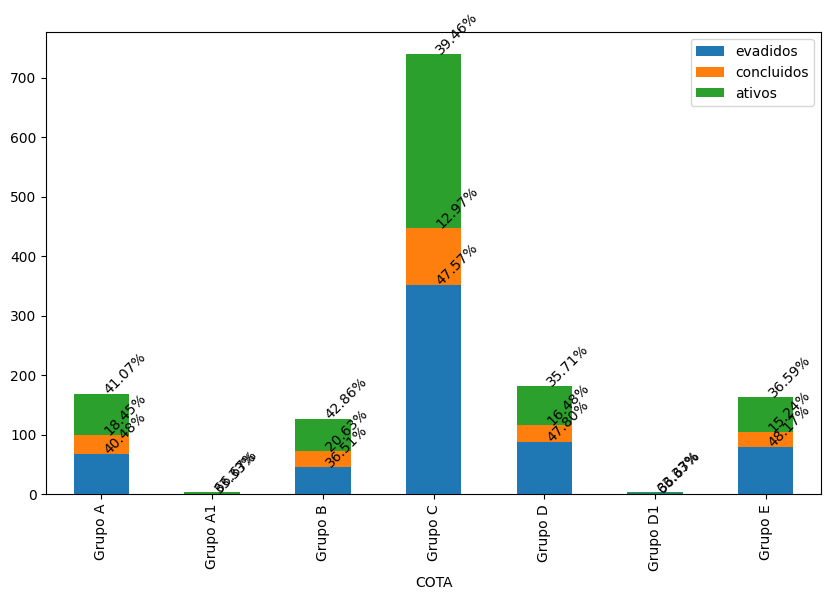

In [16]:
# Para gerar um gráfico que mostra a relação entre ingressantes e evadidos por curso, 
# incluindo qualquer outra coluna do DataFrame df_ingressantes_apos_2012,
# substitua as variáveis abaixo (coluna e curso)

# coluna =
# Funciona para : ANO_INGRESSO, SEMESTRE_INGRESSO, TIPO_INGRESSO, 
# COTA, CAMPUS, ETNIA, SEXO
# TURNO - faz sentido para os cursos com turnos diferentes como por exemplo: 
# LETRAS, FÍSICA, MATEMÁTICA
# Não funciona para: CURSO_NOME, AREA, SITUACAO, MOTIVO_SAIDA

# cursos: 'CIÊNCIAS BIOLÓGICAS', 'ADMINISTRAÇÃO', 'CIÊNCIAS CONTÁBEIS',
#       'CIÊNCIAS ECONÔMICAS', 'DIREITO', 'FARMÁCIA', 'FISIOTERAPIA',
#       'MEDICINA', 'FILOSOFIA', 'NUTRIÇÃO', 'FÍSICA', 'ODONTOLOGIA',
#       'GEOGRAFIA', 'EDUCAÇÃO FÍSICA', 'HISTÓRIA', 'LETRAS', 'PEDAGOGIA',
#       'SERVIÇO SOCIAL', 'ENFERMAGEM', 'ENGENHARIA CIVIL', 'PSICOLOGIA',
#       'ARQUITETURA E URBANISMO', 'CIÊNCIA DA COMPUTAÇÃO',
#       'ENGENHARIA DE PRODUÇÃO', 'MÚSICA', 'CIÊNCIAS EXATAS',
#       'ENGENHARIA COMPUTACIONAL', 'ESTATÍSTICA', 'MATEMÁTICA', 'QUÍMICA',
#       'ENGENHARIA ELÉTRICA - ENERGIA',
#       'ENGENHARIA ELÉTRICA - ROBÓTICA E AUTOMAÇÃO INDUSTRIAL',
#       'ENGENHARIA ELÉTRICA - SISTEMAS DE POTÊNCIA',
#       'ENGENHARIA ELÉTRICA - SISTEMAS ELETRÔNICOS',
#       'ENGENHARIA ELÉTRICA -  TELECOMUNICAÇÕES', 'ENGENHARIA MECÂNICA',
#       'BACHARELADO INTERDISCIPLINAR EM ARTES E DESIGN',
#       'CINEMA E AUDIOVISUAL', 'BACHARELADO EM ARTES VISUAIS',
#       'BACHARELADO EM DESIGN', 'BACHARELADO EM MODA',
#       'LICENCIATURA EM ARTES VISUAIS',
#       'ENGENHARIA AMBIENTAL E SANITÁRIA',
#       'BACHARELADO INTERDISCIPLINAR EM CIÊNCIAS HUMANAS',
#       'CIÊNCIA DA RELIGIÃO', 'CIÊNCIAS SOCIAIS', 'TURISMO',
#       'SISTEMAS DE INFORMAÇÃO', 'JORNALISMO', 'MEDICINA VETERINÁRIA',
#       'LETRAS - LIBRAS', 'LICENCIATURA EM MÚSICA',
#       'RÁDIO  TV E INTERNET'

coluna = "COTA"
curso = "ADMINISTRAÇÃO"

cota_por_curso(evadido_vs_ingressante_por_filtro(df_ingressantes_apos_2012, coluna), curso)

In [17]:
# Função utilizada para gerar um gráfico que mostra os cursos com as maiores taxas
# de evasão de acordo com o grupo de cotas escolhido.

def evasao_por_grupo(d, grupo):
    d = evadido_vs_ingressante_por_filtro(d, 'COTA')
    filtro_por_grupo = d.loc[d.index.get_level_values('COTA') == grupo]
    ordena_por_evasao = filtro_por_grupo.sort_values(by=['pct_evasao'], ascending=False)
    plot_grafico(ordena_por_evasao.index.get_level_values('CURSO_NOME'),
                ordena_por_evasao['pct_evasao'], grupo)

In [18]:
# Função utilizada para gerar o gráfico.

def plot_grafico(x, y, grupo):
    f, axes = plt.subplots(1, 1,  figsize=(16, 6))
    g = sns.barplot(x=x, y=y)
    axes.set_title(f'Curso X Taxa de Evasão - {grupo} (2013 - 2023)', fontsize=14)
    axes.set_ylabel('Taxa de Evasão', fontsize=14)
    axes.set(xlabel='')     
    plt.xticks(rotation=90)    
    plt.show()

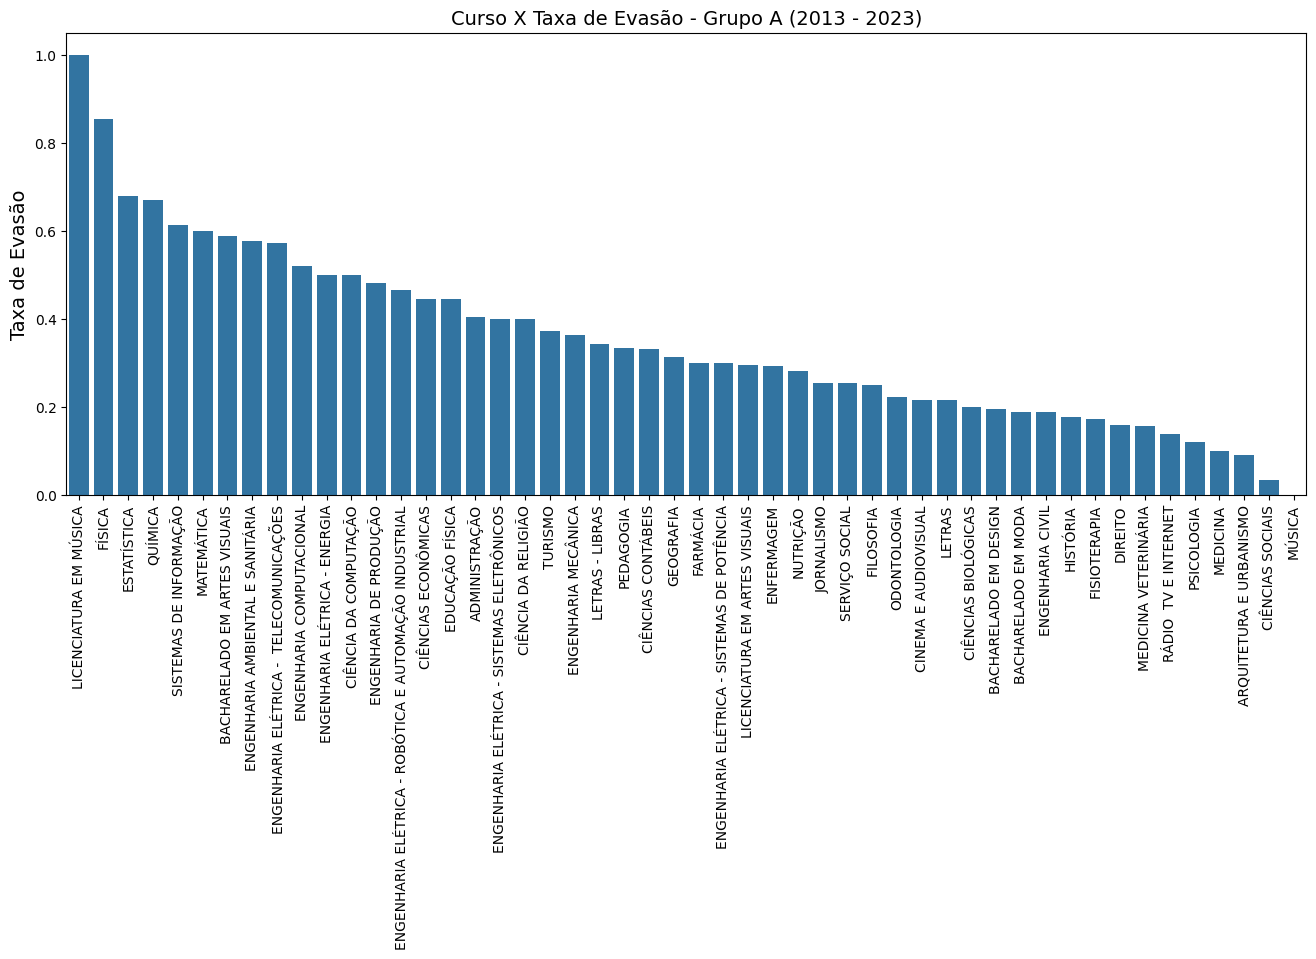

In [19]:
evasao_por_grupo(df_ingressantes_apos_2012, 'Grupo A')